In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [21]:
import gftt
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from matplotlib.colors import ListedColormap
import rasterio
from rasterio.plot import show
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.patches as patches
import seaborn as sns

In [3]:
df = pd.read_csv('../results_agu21.csv', dtype=str)
df

Date Chip (px) Resolution (px) Prefilter  \
0   LS8-20180304-20180405        32               1       Gau   
1   LS8-20180304-20180405        32               1      NAOF   
2   LS8-20180304-20180405        32               1      None   
3   LS8-20180304-20180405        32               4       Gau   
4   LS8-20180304-20180405        32               4      NAOF   
5   LS8-20180304-20180405        32               4      None   
6   LS8-20180304-20180405        32               8       Gau   
7   LS8-20180304-20180405        32               8      NAOF   
8   LS8-20180304-20180405        32               8      None   
9   LS8-20180304-20180405        64               1       Gau   
10  LS8-20180304-20180405        64               1      NAOF   
11  LS8-20180304-20180405        64               1      None   
12  LS8-20180304-20180405        64               4       Gau   
13  LS8-20180304-20180405        64               4      NAOF   
14  LS8-20180304-20180405        64               4      None   
15  LS8-20180304-20180405        64               8       Gau   
16  LS8-20180304-20180405        64               8      NAOF   
17  LS8-20180304-20180405        64               8      None   
18  LS8-20180304-20180405     multi              16      NAOF   
19  LS8-20180304-20180405     multi               4      NAOF   
20  LS8-20180304-20180405     multi              16       Gau   
21  LS8-20180304-20180405     multi               4       Gau   
22  LS8-20180304-20180405     multi              16      None   
23  LS8-20180304-20180405     multi               4      None   
24  LS8-20180304-20180405        31               1       Gau   
25  LS8-20180304-20180405        65               1       Gau   
26  LS8-20180304-20180405        31               1      None   
27  LS8-20180304-20180405        65               1      None   
28  LS8-20180304-20180405        31               1       LoG   
29  LS8-20180304-20180405        31               1       LoG   
30  LS8-20180304-20180405        32               4      None   
31  LS8-20180304-20180405        32               8      None   
32  LS8-20180304-20180405        64               4      None   
33  LS8-20180304-20180405        64               8      None   
34  LS8-20180304-20180405        32               4       Gau   
35  LS8-20180304-20180405        32               8       Gau   
36  LS8-20180304-20180405        64               4       Gau   
37  LS8-20180304-20180405        64               8       Gau   
38  LS8-20180304-20180405        32               4      NAOF   
39  LS8-20180304-20180405        32               8      NAOF   
40  LS8-20180304-20180405        64               4      NAOF   
41  LS8-20180304-20180405        64               8      NAOF   

                 Subpixel  Software  \
0    16-node oversampling     CARST   
1    16-node oversampling     CARST   
2    16-node oversampling     CARST   
3    16-node oversampling     CARST   
4    16-node oversampling     CARST   
5    16-node oversampling     CARST   
6    16-node oversampling     CARST   
7    16-node oversampling     CARST   
8    16-node oversampling     CARST   
9    16-node oversampling     CARST   
10   16-node oversampling     CARST   
11   16-node oversampling     CARST   
12   16-node oversampling     CARST   
13   16-node oversampling     CARST   
14   16-node oversampling     CARST   
15   16-node oversampling     CARST   
16   16-node oversampling     CARST   
17   16-node oversampling     CARST   
18  interest point groups       GIV   
19  interest point groups       GIV   
20  interest point groups       GIV   
21  interest point groups       GIV   
22  interest point groups       GIV   
23  interest point groups       GIV   
24              parabolic      Vmap   
25              parabolic      Vmap   
26              parabolic      Vmap   
27              parabolic      Vmap   
28              parabolic      Vmap   
29        affine adaptive      Vmap   
30              

In [4]:
# on-ice area
in_shp = '/home/jovyan/Projects/PX_comparison/Bedrock_shp/glacier_V1_Kaskawulsh_s.shp'
on_ice = gpd.read_file(in_shp)

In [5]:
## Example results
demo = df.loc[22]
print(demo)

Date                                           LS8-20180304-20180405
Chip (px)                                                      multi
Resolution (px)                                                   16
Prefilter                                                       None
Subpixel                                       interest point groups
Software                                                         GIV
Vx                 /home/jovyan/Projects/PX_comparison/PX/GIV/u_l...
Vy                 /home/jovyan/Projects/PX_comparison/PX/GIV/v_l...
OIE-x                                             0.6140104136459059
OIE-y                                             0.7672143993258354
SS-x                                                 17.388386174019
SS-y                                               19.71987637543609
Name: 22, dtype: object


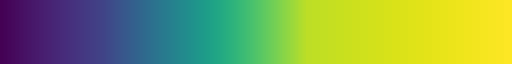

In [6]:
viridis = cm.get_cmap('viridis', 256)
newcolors1 = viridis(np.linspace(0, 0.2, 128))
newcolors2 = viridis(np.linspace(0.2, 0.9, 256))
newcolors3 = viridis(np.linspace(0.9, 1, 256))
newcolors = np.vstack((newcolors1, newcolors2, newcolors3))
cmap = ListedColormap(newcolors)
cmap.set_over(np.array([202,0,32,128]) / 255)
cmap.set_under(np.array([0,0,0,128]) / 255)
cmap

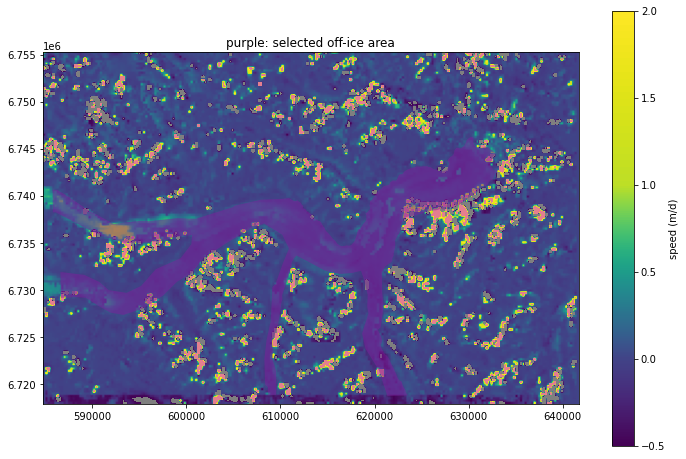

In [7]:
fig, ax0 = plt.subplots(1, 1, figsize=(12, 8))

with rasterio.open(demo.Vx) as v_src:
    v = v_src.read(1)
    show(v_src, ax=ax0, vmin=-0.5, vmax=2, cmap=cmap)
    
cbar =  fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-0.5, vmax=2), cmap=cmap), ax=ax0)
cbar.set_label('speed (m/d)')
on_ice.plot(ax=ax0, alpha=0.5, facecolor='xkcd:purple')
ax0.set_title('purple: selected off-ice area');

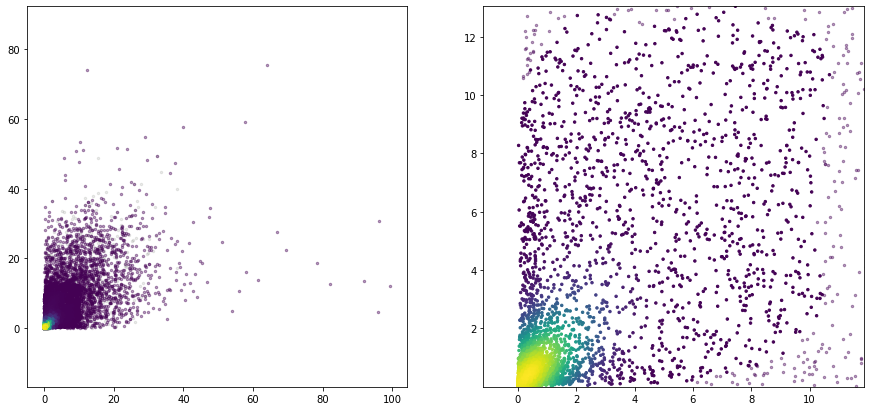

In [8]:
fig, ax1 = plt.subplots(1, 2, figsize=(15, 7))

for ax in ax1:
    ax.axis('equal')
sx, sy, z, thres_idx = gftt.sobel_scattering(vxfile=demo.Vx, vyfile=demo.Vy, on_ice_area=in_shp, ax=ax1[0])
gftt.plot_off_ice_errors(sx, sy, z, thres_idx, ax=ax1[1])

# limrange = (0, 3)
# ax1[0].set_xlim(limrange)
# ax1[0].set_ylim(limrange)
# ax1[1].set_xlim(limrange)
# ax1[1].set_ylim(limrange)

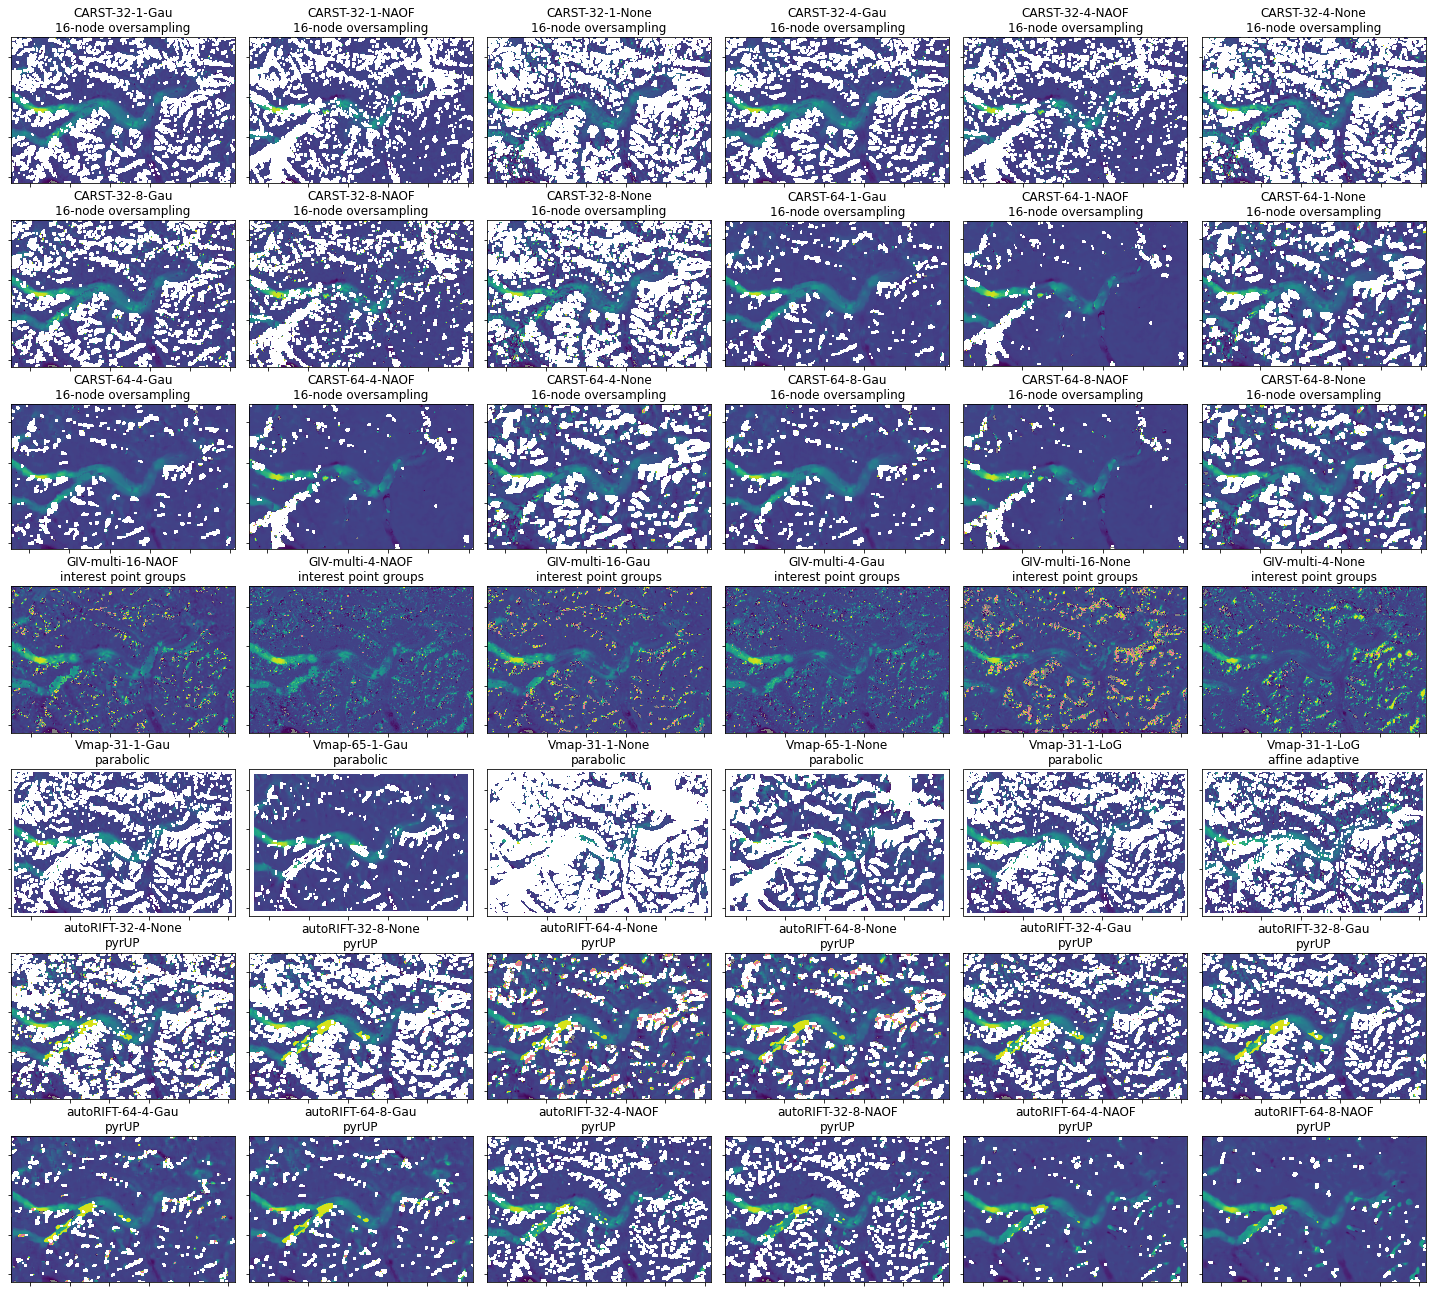

In [9]:
fig, ax2 = plt.subplots(7, 6, figsize=(20, 18))

demo = df
n = 0

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax_sel = ax2[n // 6, n % 6]
    
    with rasterio.open(row.Vx) as vx_src:
        show(vx_src, ax=ax_sel, vmin=-0.5, vmax=2, cmap=cmap)
    ax_sel.set_title(label)
    ax_sel.xaxis.set_ticklabels([])
    ax_sel.yaxis.set_ticklabels([])
        
    n += 1
    
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('tmp.png')

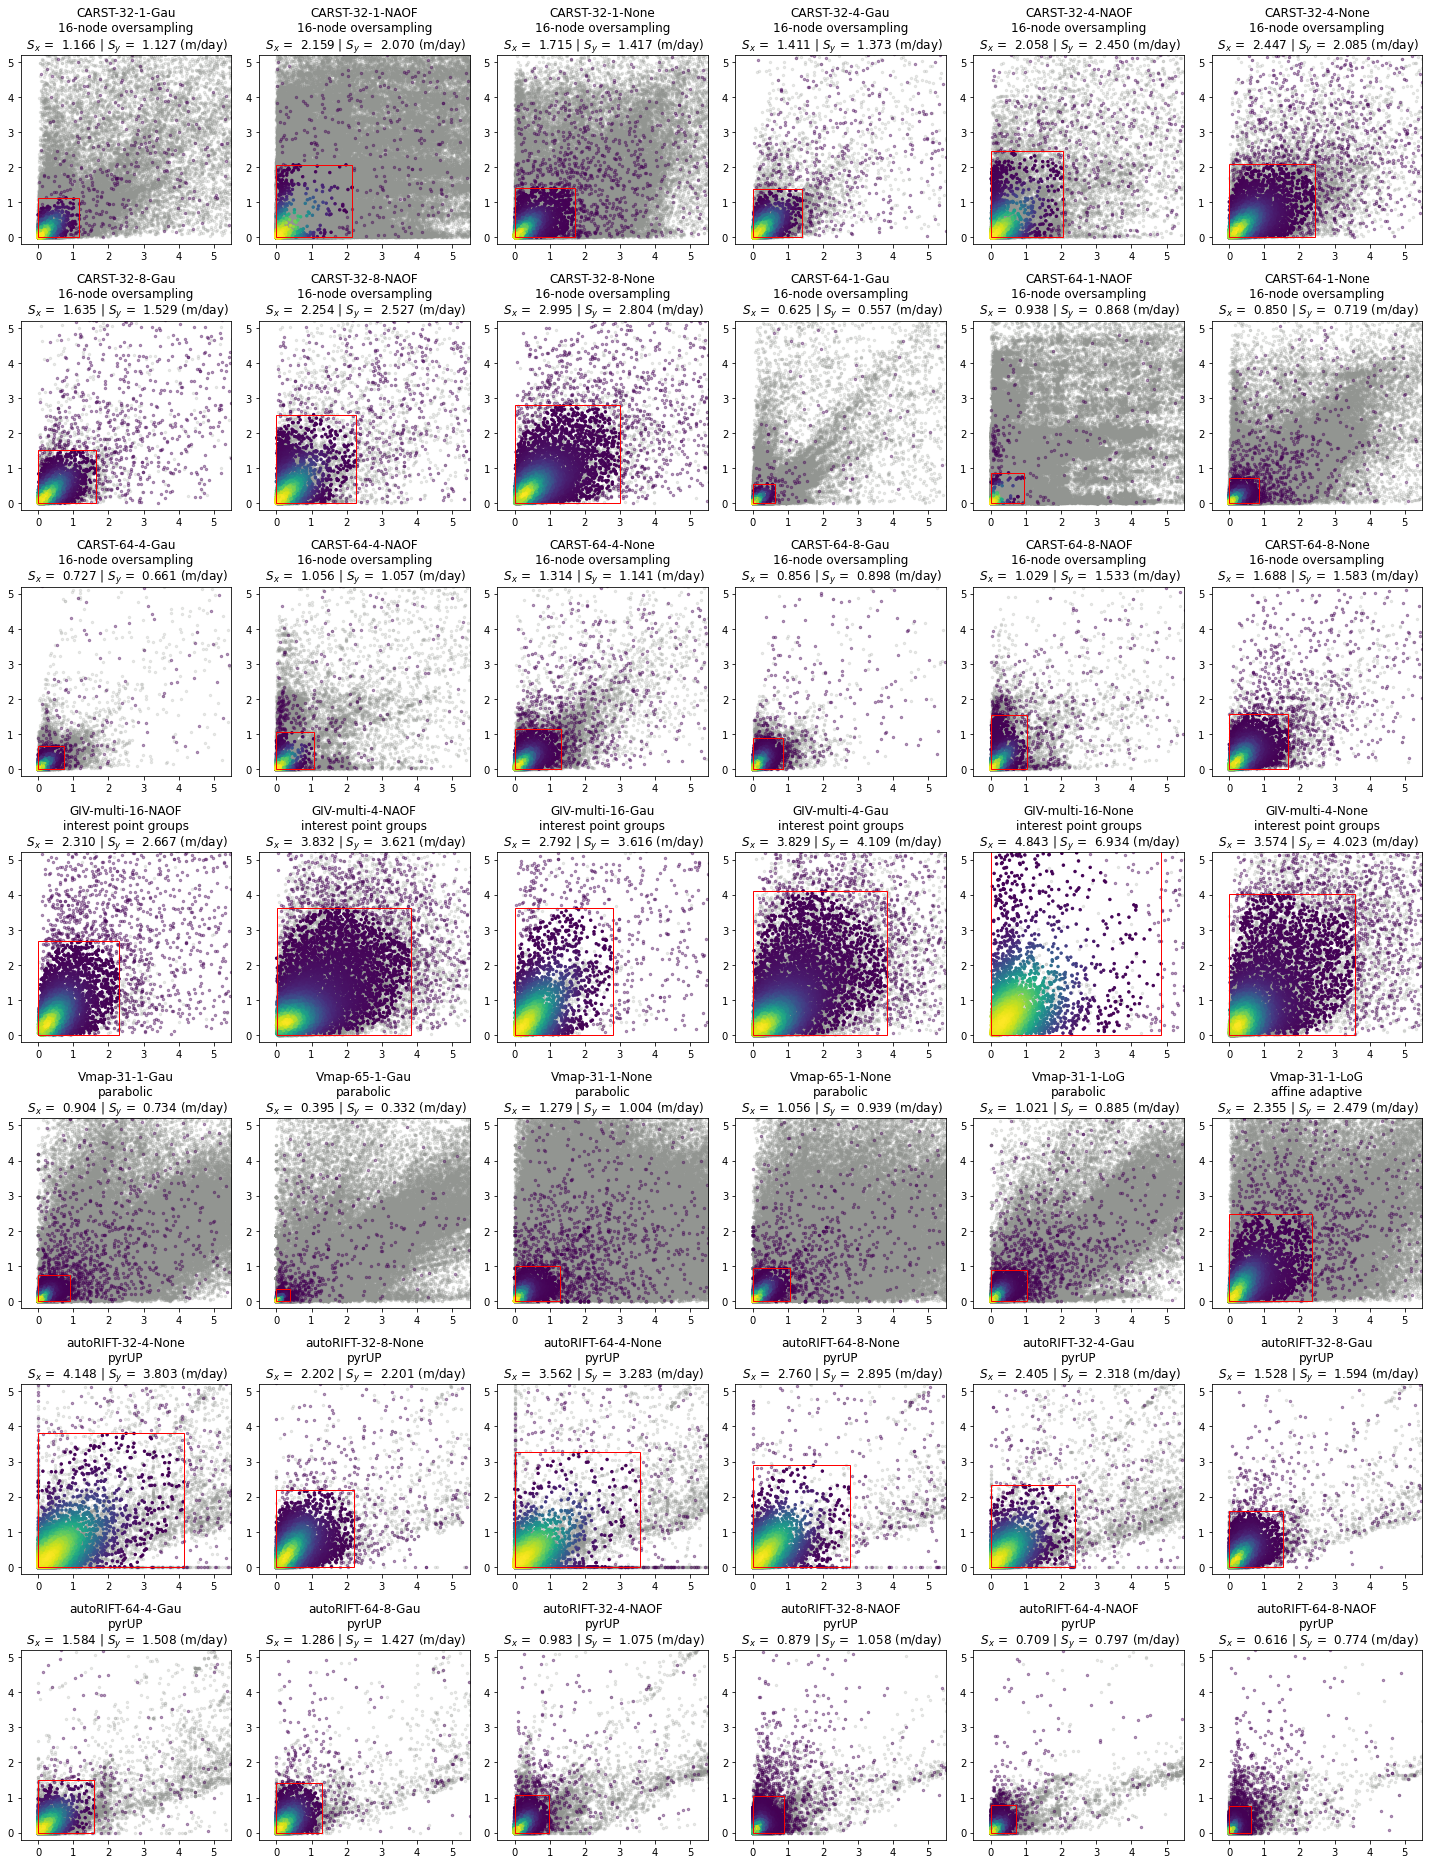

In [10]:
fig, ax3 = plt.subplots(7, 6, figsize=(20, 26))

demo = df
n = 0

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax_sel = ax3[n // 6, n % 6]
    ax_sel.axis('equal')
    
    if row.Software == 'GIV':
        sx, sy, z, thres_idx = gftt.sobel_scattering(vxfile=row.Vx, vyfile=row.Vy, wfile=row.Vx.replace('u_', 'pkr_'), on_ice_area=in_shp, max_n=10000, plot=True, ax=ax_sel)
    else:
        sx, sy, z, thres_idx = gftt.sobel_scattering(vxfile=row.Vx, vyfile=row.Vy, on_ice_area=in_shp, max_n=10000, plot=True, ax=ax_sel)
    # gftt.plot_off_ice_errors(vx, vy, z, thres_idx, ax=ax_sel, zoom=True)
    ax_sel.set_xlim(0, 5)
    ax_sel.set_ylim(0, 5)

    rect = patches.Rectangle((min(sx[thres_idx]), min(sy[thres_idx])), max(sx[thres_idx]) - min(sx[thres_idx]), max(sy[thres_idx]) - min(sy[thres_idx]), 
                              linewidth=1, edgecolor='r', facecolor='none')
    ax_sel.add_patch(rect)
    
    demo.loc[idx, 'SS-x'] = max(sx[thres_idx])
    demo.loc[idx, 'SS-y'] = max(sy[thres_idx])
    label += '\n $S_x$ = {:6.3f} | $S_y$ = {:6.3f} (m/day)'.format(demo.loc[idx, 'SS-x'], 
                                                                   demo.loc[idx, 'SS-y'])
    ax_sel.set_title(label)
    # ax_sel.xaxis.set_ticklabels([])
    # ax_sel.yaxis.set_ticklabels([])
    

        
    n += 1
    
    
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
fig.savefig('tmp.png')

In [11]:
demo.to_csv('../results_agu21.csv', index=False)

In [12]:
demo

Date Chip (px) Resolution (px) Prefilter  \
0   LS8-20180304-20180405        32               1       Gau   
1   LS8-20180304-20180405        32               1      NAOF   
2   LS8-20180304-20180405        32               1      None   
3   LS8-20180304-20180405        32               4       Gau   
4   LS8-20180304-20180405        32               4      NAOF   
5   LS8-20180304-20180405        32               4      None   
6   LS8-20180304-20180405        32               8       Gau   
7   LS8-20180304-20180405        32               8      NAOF   
8   LS8-20180304-20180405        32               8      None   
9   LS8-20180304-20180405        64               1       Gau   
10  LS8-20180304-20180405        64               1      NAOF   
11  LS8-20180304-20180405        64               1      None   
12  LS8-20180304-20180405        64               4       Gau   
13  LS8-20180304-20180405        64               4      NAOF   
14  LS8-20180304-20180405        64               4      None   
15  LS8-20180304-20180405        64               8       Gau   
16  LS8-20180304-20180405        64               8      NAOF   
17  LS8-20180304-20180405        64               8      None   
18  LS8-20180304-20180405     multi              16      NAOF   
19  LS8-20180304-20180405     multi               4      NAOF   
20  LS8-20180304-20180405     multi              16       Gau   
21  LS8-20180304-20180405     multi               4       Gau   
22  LS8-20180304-20180405     multi              16      None   
23  LS8-20180304-20180405     multi               4      None   
24  LS8-20180304-20180405        31               1       Gau   
25  LS8-20180304-20180405        65               1       Gau   
26  LS8-20180304-20180405        31               1      None   
27  LS8-20180304-20180405        65               1      None   
28  LS8-20180304-20180405        31               1       LoG   
29  LS8-20180304-20180405        31               1       LoG   
30  LS8-20180304-20180405        32               4      None   
31  LS8-20180304-20180405        32               8      None   
32  LS8-20180304-20180405        64               4      None   
33  LS8-20180304-20180405        64               8      None   
34  LS8-20180304-20180405        32               4       Gau   
35  LS8-20180304-20180405        32               8       Gau   
36  LS8-20180304-20180405        64               4       Gau   
37  LS8-20180304-20180405        64               8       Gau   
38  LS8-20180304-20180405        32               4      NAOF   
39  LS8-20180304-20180405        32               8      NAOF   
40  LS8-20180304-20180405        64               4      NAOF   
41  LS8-20180304-20180405        64               8      NAOF   

                 Subpixel  Software  \
0    16-node oversampling     CARST   
1    16-node oversampling     CARST   
2    16-node oversampling     CARST   
3    16-node oversampling     CARST   
4    16-node oversampling     CARST   
5    16-node oversampling     CARST   
6    16-node oversampling     CARST   
7    16-node oversampling     CARST   
8    16-node oversampling     CARST   
9    16-node oversampling     CARST   
10   16-node oversampling     CARST   
11   16-node oversampling     CARST   
12   16-node oversampling     CARST   
13   16-node oversampling     CARST   
14   16-node oversampling     CARST   
15   16-node oversampling     CARST   
16   16-node oversampling     CARST   
17   16-node oversampling     CARST   
18  interest point groups       GIV   
19  interest point groups       GIV   
20  interest point groups       GIV   
21  interest point groups       GIV   
22  interest point groups       GIV   
23  interest point groups       GIV   
24              parabolic      Vmap   
25              parabolic      Vmap   
26              parabolic      Vmap   
27              parabolic      Vmap   
28              parabolic      Vmap   
29        affine adaptive      Vmap   
30              

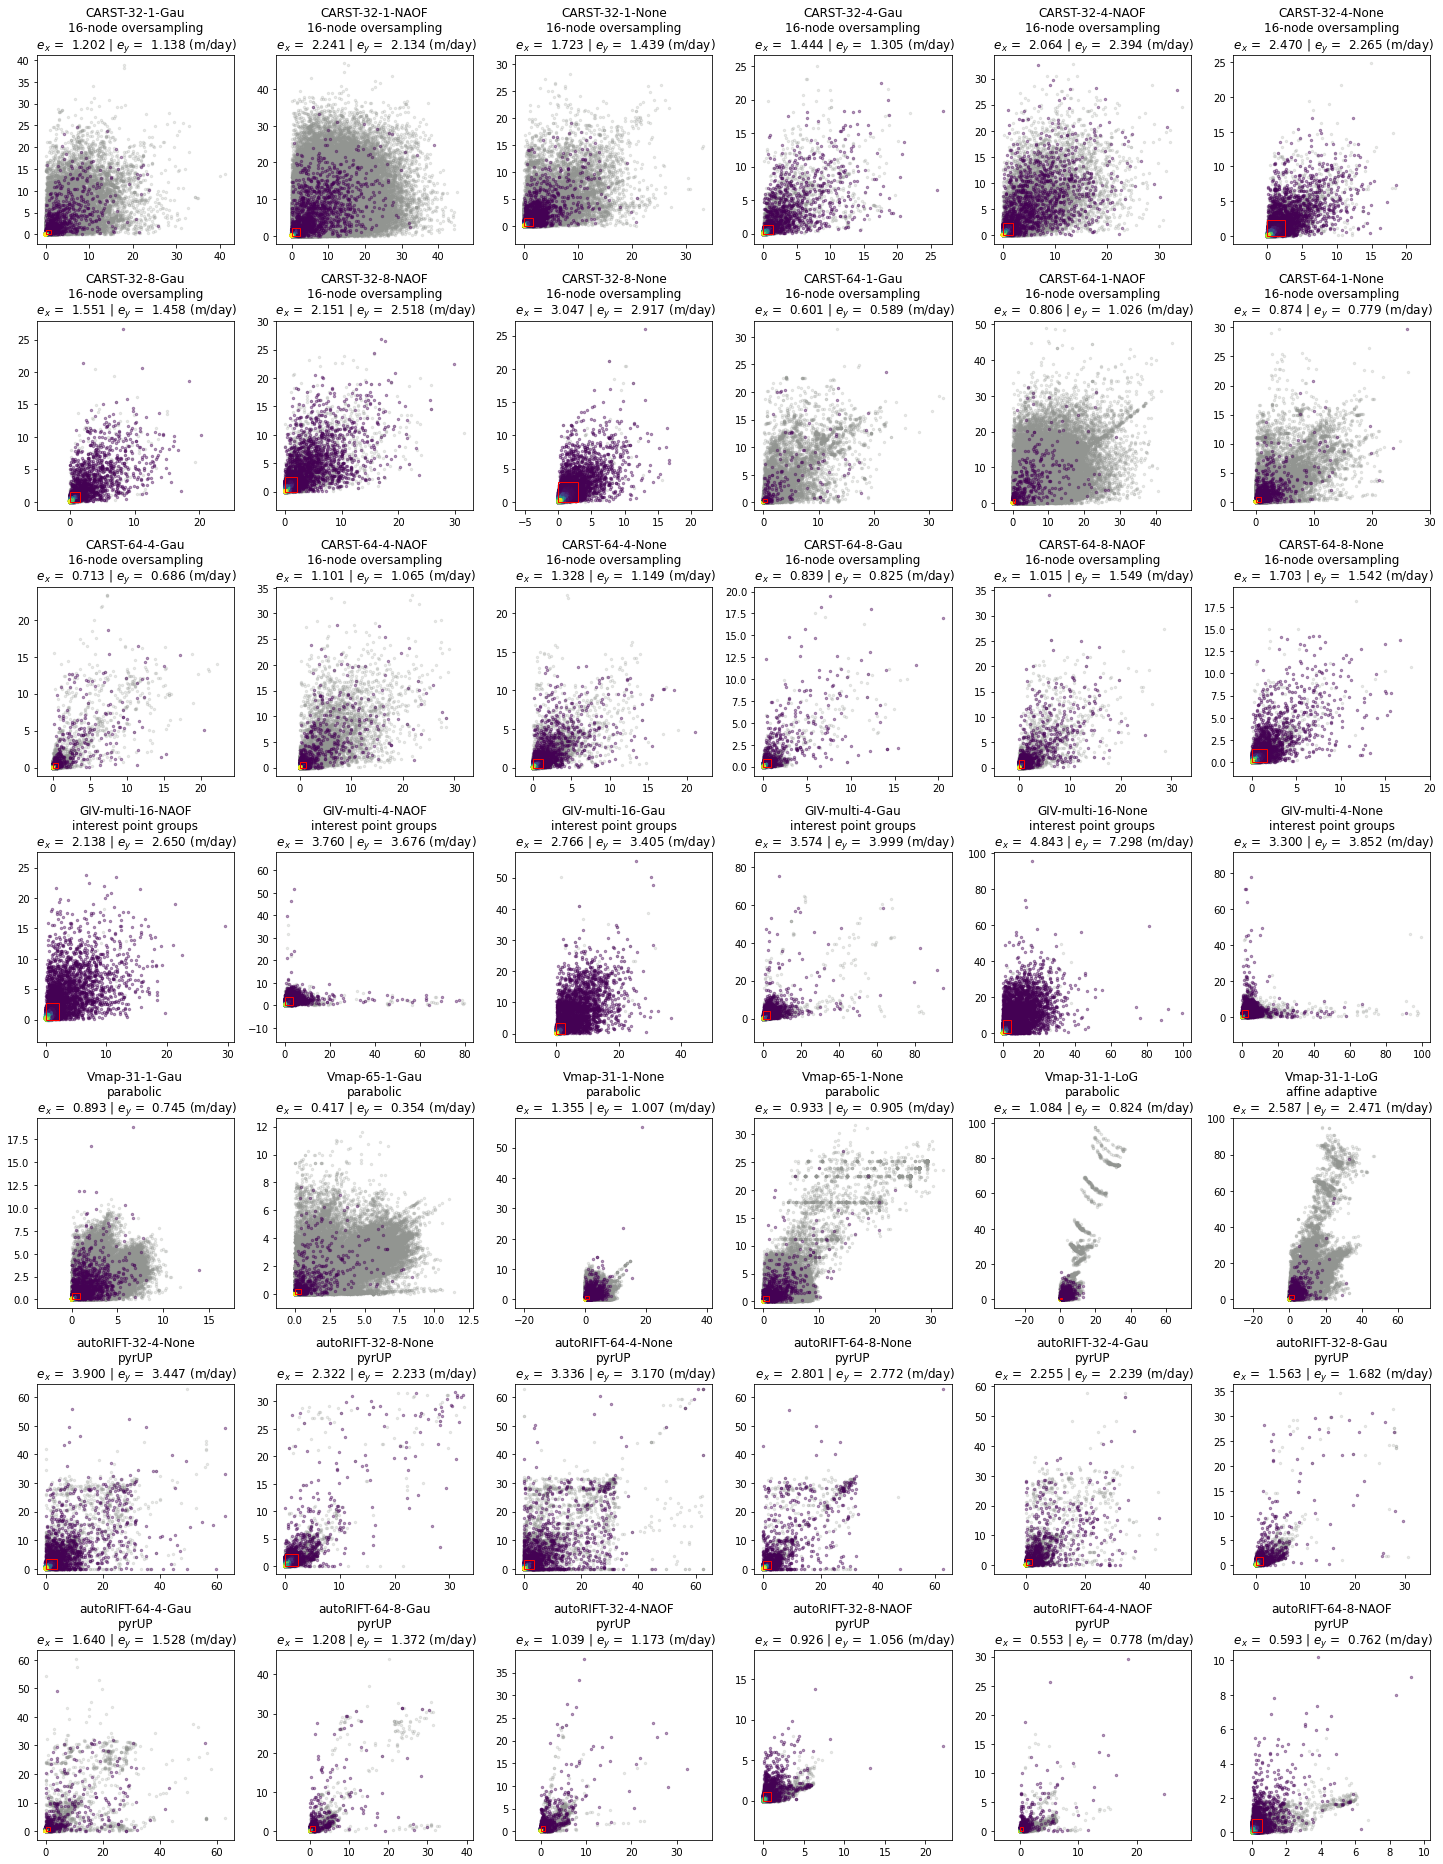

In [15]:
fig, ax4 = plt.subplots(7, 6, figsize=(20, 26))

n = 0
demo = df

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax_sel = ax4[n // 6, n % 6]
    ax_sel.axis('equal')

    if row.Software == 'GIV':
        sx, sy, z, thres_idx = gftt.sobel_scattering(vxfile=row.Vx, vyfile=row.Vy, wfile=row.Vx.replace('u_', 'pkr_'), on_ice_area=in_shp, max_n=10000, plot=True, ax=ax_sel)
    else:
        sx, sy, z, thres_idx = gftt.sobel_scattering(vxfile=row.Vx, vyfile=row.Vy, on_ice_area=in_shp, max_n=10000, plot=True, ax=ax_sel)
    # gftt.plot_off_ice_errors(vx, vy, z, thres_idx, ax=ax_sel, zoom=True)
    # ax_sel.set_xlim(-0.5, 0.5)
    # ax_sel.set_ylim(-0.5, 0.5)
    
    rect = patches.Rectangle((min(sx[thres_idx]), min(sy[thres_idx])), max(sx[thres_idx]) - min(sx[thres_idx]), max(sy[thres_idx]) - min(sy[thres_idx]), 
                              linewidth=1, edgecolor='r', facecolor='none')
    ax_sel.add_patch(rect)
    label += '\n $e_x$ = {:6.3f} | $e_y$ = {:6.3f} (m/day)'.format(max(sx[thres_idx]), 
                                                                   max(sy[thres_idx]))
    ax_sel.set_title(label)
    # ax_sel.xaxis.set_ticklabels([])
    # ax_sel.yaxis.set_ticklabels([])
        
    n += 1
    
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')

In [22]:
df['OIE-x'] = df['OIE-x'].astype(float)
df['OIE-y'] = df['OIE-y'].astype(float)
# demo.plot.scatter(x='OIE-x', y='SS-x', c='Software')

<AxesSubplot:xlabel='OIE-x', ylabel='SS-x'>

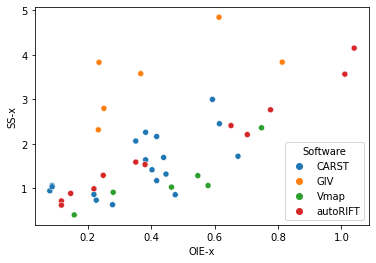

In [24]:
sns.scatterplot(data=demo, x='OIE-x', y='SS-x', hue='Software')

<AxesSubplot:xlabel='OIE-y', ylabel='SS-y'>

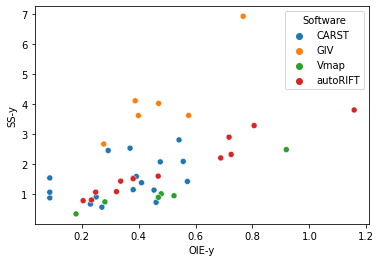

In [25]:
sns.scatterplot(data=demo, x='OIE-y', y='SS-y', hue='Software')

<AxesSubplot:xlabel='OIE-x', ylabel='SS-x'>

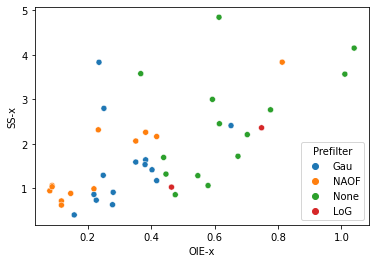

In [26]:
sns.scatterplot(data=demo, x='OIE-x', y='SS-x', hue='Prefilter')

<AxesSubplot:xlabel='OIE-x', ylabel='SS-x'>

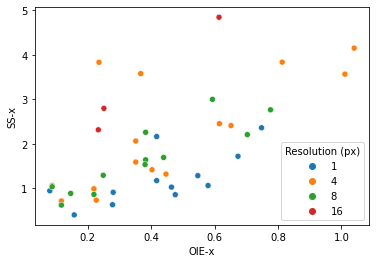

In [27]:
sns.scatterplot(data=demo, x='OIE-x', y='SS-x', hue='Resolution (px)')

<AxesSubplot:xlabel='OIE-x', ylabel='SS-x'>

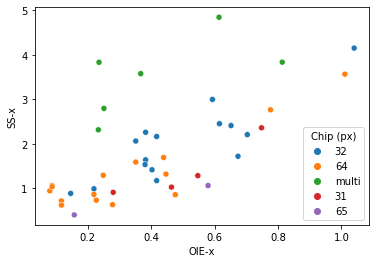

In [28]:
sns.scatterplot(data=demo, x='OIE-x', y='SS-x', hue='Chip (px)')

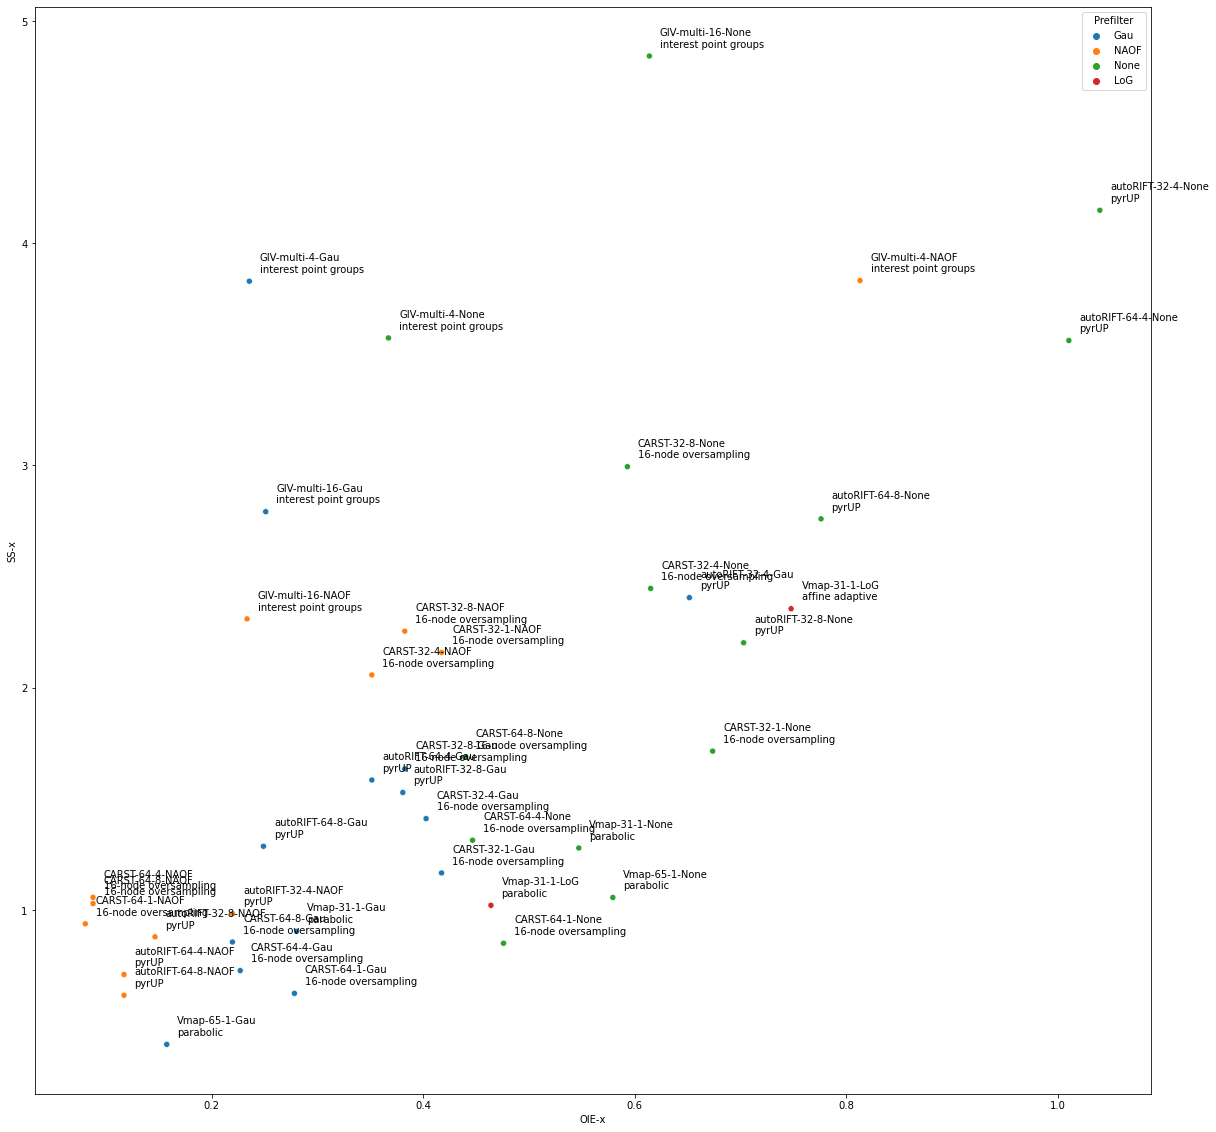

In [33]:
fig, ax5 = plt.subplots(1, 1, figsize=(20, 20))

sns.scatterplot(data=demo, x='OIE-x', y='SS-x', hue='Prefilter', ax=ax5)

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax5.text(row['OIE-x'] + 0.01, row['SS-x'] + 0.04, label)


In [69]:
demo = df.loc[30]
sx, sy = gftt.sobel_scattering(vxfile=demo.Vx, vyfile=demo.Vy, on_ice_area=in_shp)

In [70]:
sx.shape

(460472,)

(array([4.31833e+05, 1.39620e+04, 5.53700e+03, 3.39800e+03, 2.84900e+03,
        1.85200e+03, 3.43000e+02, 2.54000e+02, 1.63000e+02, 1.73000e+02]),
 array([ 0.       ,  5.6459966, 11.291993 , 16.93799  , 22.583986 ,
        28.229982 , 33.87598  , 39.521976 , 45.167973 , 50.81397  ,
        56.459965 ], dtype=float32),
 <BarContainer object of 10 artists>)

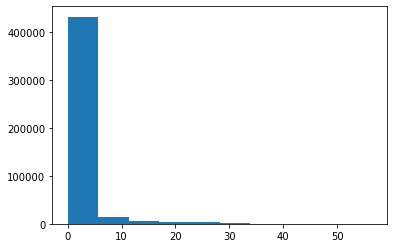

In [71]:
plt.hist(sx)

In [72]:
np.sum(np.isnan(sx))

0